# url: https://esu-ko.hatenablog.com/entry/2020/06/21/Pandas%E3%81%A7%E3%83%87%E3%82%B7%E3%83%AB%E5%88%86%E6%9E%90%E3%82%92%E3%81%97%E3%81%9F%E3%81%84%28qcut%E3%82%92%E4%BD%BF%E3%81%86%29


# デシル分析のイメージ
デシル分析は、施策の範囲や打ち分けを決める際にシンプルにできる手法です。

現状では、デジタルでは、施策を全体にうってもコストが変わらなかったり、 初めからidと紐づいたデータが取れることも増えたので、あまり使うことはなかもしれませんが、 それでも覚えておくと便利です。

ユーザー単体の行動数や、売り上げなどをもとに、ユーザーを10個のグループに分けます。このグループは、ユーザー数が同数になっていますが、行動数や売上の値がグループごとに異なっています。

そのため、ユーザーあたりの施策コストが同じ場合、コストはユーザーあたりコスト✖️グループあたりユーザー✖️対象グループ数で計算でき、 取り扱いが非常に楽になります。

似たような分析で行動数や売上を等分する方法もありますが、こちらは、グループ数あたりのユーザー数にばらつきが生まれるため、 コスト計算や、施策あたりのターゲットユーザー数の計算が別途必要になります。

# デシル分析の進め方(売上の場合)

1. ユーザーごとに売上を持ったデータを用意
2. 売上をもとにユーザー数が等分となるようなグループを作成
3. グループで集計し、そのグループの特徴や、総売上に占める割合を出す

Pandasには2を簡単にできるqcutが存在します。

# 1. ユーザーごとに売上を持ったデータを用意

<Axes: >

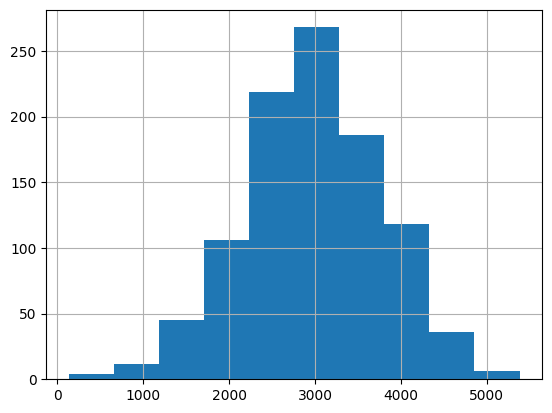

In [1]:
import numpy as np
import pandas as pd
import random

# 平均売上3000円のデータを作成
dat = pd.Series([round(random.gauss(3000,800)) for i in range(1000)])

# 分布をみておく
dat.hist()

# 2. 売上をもとにユーザー数が等分となるようなグループを作成

In [2]:
dec_label = ['d' + str(i + 1) for i in range(10)]
dec = pd.qcut(dat, 10, dec_label)

df = pd.DataFrame({'sales':dat, 'dec':dec})
display(df)

,sales,dec
0,4345,d10
1,2037,d2
2,1522,d1
3,3099,d6
4,4006,d10
...,...,...
995,2259,d2
996,2459,d3
997,2713,d4
998,2701,d4


# 3. グループで集計し、そのグループの特徴や、総売上に占める割合を出す

In [3]:
# 集計
# 個数、グループ内合計売上、グループ内平均
df_agg = df.groupby(dec).agg([len, sum, np.mean])
df_agg.columns = ['count','total_of_sales','mean_of_sales']

# 表計算
# 全体売上に対するグループ売上の割合、割合の累計、割合が何番目か
df_agg['rate_of_total_sales'] = df_agg.total_of_sales / df_agg.total_of_sales.sum()
df_agg['cumrate_of_total_sales'] = df_agg.total_of_sales.cumsum() / df_agg.total_of_sales.sum()
df_agg['rank_of_rate'] = df_agg.rate_of_total_sales.rank(ascending=False)

display(df_agg)

<ipython-input-3-08af95f16ebb>:3: FutureWarning: ['dec'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_agg = df.groupby(dec).agg([len, sum, np.mean])


,count,total_of_sales,mean_of_sales,rate_of_total_sales,cumrate_of_total_sales,rank_of_rate
d1,100,151652,1516.520000,0.050922,0.050922,10.0
d2,100,215885,2158.850000,0.072490,0.123412,9.0
d3,100,249296,2492.960000,0.083709,0.207121,8.0
d4,101,272347,2696.504950,0.091449,0.298571,7.0
d5,100,288273,2882.730000,0.096797,0.395368,6.0
d6,99,303056,3061.171717,0.101761,0.497128,5.0
d7,100,328821,3288.210000,0.110412,0.607541,4.0
d8,100,353468,3534.680000,0.118688,0.726229,3.0
d9,100,382614,3826.140000,0.128475,0.854704,2.0
d10,100,432710,4327.100000,0.145296,1.000000,1.0
